In [13]:
import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sb

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

path = "."

originalDatasetFile = os.path.join(path, "Clean_Dataset.csv")
originalDataset = pd.read_csv(originalDatasetFile, index_col = 0)

originalDataset = originalDataset.sort_values(by = 'airline', ascending = True)

originalDataset.drop('flight', 1, inplace = True)

originalDataset['price'] = (originalDataset["price"]*0.011).round(2)

print(originalDataset)

        airline source_city departure_time        stops arrival_time  \
184894  AirAsia     Chennai          Night          one      Morning   
186660  AirAsia     Chennai        Morning  two_or_more   Late_Night   
186659  AirAsia     Chennai        Morning          one   Late_Night   
186658  AirAsia     Chennai        Morning  two_or_more        Night   
186657  AirAsia     Chennai        Morning          one        Night   
...         ...         ...            ...          ...          ...   
211524  Vistara       Delhi        Evening          one        Night   
87243   Vistara   Bangalore        Evening          one   Late_Night   
87244   Vistara   Bangalore        Morning          one    Afternoon   
87482   Vistara   Bangalore        Morning          one      Evening   
300152  Vistara     Chennai        Morning          one      Evening   

       destination_city     class  duration  days_left   price  
184894            Delhi   Economy     10.92         33   27.25  
18666

C:\Users\kinga\AppData\Local\Temp\ipykernel_3064\3632104423.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  originalDataset.drop('flight', 1, inplace = True)


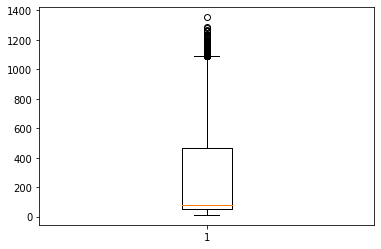

airline             False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool


In [14]:
#Valli's code - further cleanup of the data (feature engineering)

plt.boxplot(originalDataset['price'])
plt.show()

print(originalDataset.isnull().any())

In [15]:
## Valli's code
#creates a new column in the dataframe named 'price outlier'
originalDataset['price_outlier'] = 0

#to find the mean and standard deviation of the price values to work out the outlier
price_mean = np.mean(originalDataset['price'])
print(price_mean)
price_std = np.std(originalDataset['price'])
print(price_std)

#calculation to assign 0 or 1 to the price values (0 if the datapoint is not an outlier & 1 if it is)
originalDataset.loc[abs(originalDataset['price'] - price_mean) > 2 * price_std,'price_outlier'] = 1

#This counts the number of unique outlier values
print(Counter(originalDataset['price_outlier']))

originalDataset = originalDataset[originalDataset.price_outlier != 1]
print (originalDataset.shape)

originalDataset.drop('price_outlier', 1, inplace = True)

229.78609928936243
249.67505500334298
Counter({0: 289222, 1: 10931})
(289222, 11)


C:\Users\kinga\AppData\Local\Temp\ipykernel_3064\3285291353.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  originalDataset.drop('price_outlier', 1, inplace = True)
C:\Users\kinga\AppData\Local\Temp\ipykernel_3064\3285291353.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originalDataset.drop('price_outlier', 1, inplace = True)


In [16]:
#Valli's code

#originalDataset['log_price'] = np.log(originalDataset['price'])
#print(originalDataset[:30])

In [17]:
le = LabelEncoder()

originalDataset['airline'] = le.fit_transform(originalDataset['airline'])
originalDataset['source_city'] = le.fit_transform(originalDataset['source_city'])
originalDataset['departure_time'] = le.fit_transform(originalDataset['departure_time'])
originalDataset['arrival_time'] = le.fit_transform(originalDataset['arrival_time'])
originalDataset['destination_city'] = le.fit_transform(originalDataset['destination_city'])
originalDataset['class'] = le.fit_transform(originalDataset['class'])

# Find unique values within the stops column
print(list(set(originalDataset['stops'])))

# Match and replace the numerical values in text with integers
originalDataset['stops'] = originalDataset['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])

print(originalDataset.head())

C:\Users\kinga\AppData\Local\Temp\ipykernel_3064\1254696033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originalDataset['airline'] = le.fit_transform(originalDataset['airline'])
C:\Users\kinga\AppData\Local\Temp\ipykernel_3064\1254696033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originalDataset['source_city'] = le.fit_transform(originalDataset['source_city'])
C:\Users\kinga\AppData\Local\Temp\ipykernel_3064\1254696033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

['one', 'two_or_more', 'zero']
        airline  source_city  departure_time  stops  arrival_time  \
184894        0            1               5      1             4   
186660        0            1               4      2             3   
186659        0            1               4      1             3   
186658        0            1               4      2             5   
186657        0            1               4      1             5   

        destination_city  class  duration  days_left  price  
184894                 2      1     10.92         33  27.25  
186660                 2      1     16.00         44  27.25  
186659                 2      1     15.17         44  27.25  
186658                 2      1     13.50         44  27.25  
186657                 2      1     11.67         44  27.25  


C:\Users\kinga\AppData\Local\Temp\ipykernel_3064\1254696033.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originalDataset['stops'] = originalDataset['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])


In [18]:
result = []
for x in originalDataset.columns:
    if x != 'price' and x != 'price_outlier':
        result.append(x)
        
X = originalDataset[result].values
y = originalDataset['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

model = LinearRegression()

model.fit(X_train, y_train)

print(model.coef_)

[ 7.05048722e+00  3.54565303e-01  6.38033572e-01  5.69737664e+01
  7.61626571e-01  4.26733503e-01 -4.69077279e+02  1.08261732e+00
 -1.23833400e+00]


In [19]:
y_pred = model.predict(X_test)

originalDataset_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
originalDataset_head = originalDataset_compare.head(25)

print(originalDataset_head)

    Actual   Predicted
0   143.64  100.157186
1    71.37  109.233463
2   120.78   98.186607
3   505.94  543.592932
4    48.32   57.804842
5   621.24  503.164738
6    69.23   55.998882
7    80.87   81.306119
8   485.58  521.504751
9    63.37   59.307949
10   73.82   88.489200
11  592.18  548.330595
12   37.17   28.824443
13   47.71   69.957093
14   84.26   97.942754
15  572.69  558.496124
16  139.42   96.890153
17   49.46   94.042410
18  124.51  128.475105
19   47.89   76.935547
20   44.33   65.369377
21  593.31  573.033759
22  552.98  527.579812
23   40.80   45.367090
24  584.80  526.753205


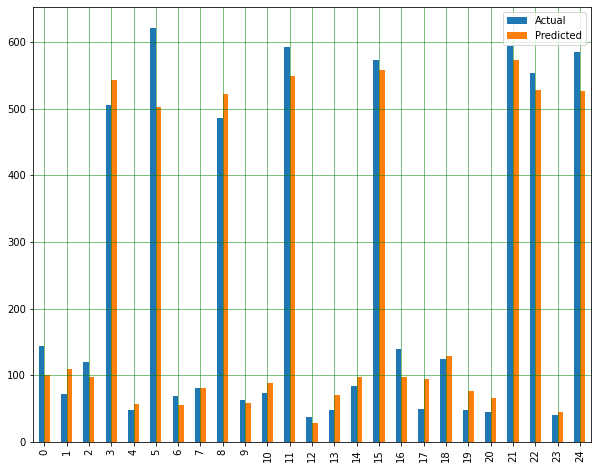

Mean: 206.79518592791078
Root Mean Squared Error: 62.67153029465222
Coefficient of determination: 0.92
Correlation:  (0.9606787903928924, 0.0)


In [20]:
originalDataset_head.plot(kind = 'bar', figsize = (10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Coefficient of determination: %.2f' % metrics.r2_score(y_test, y_pred))
print('Correlation: ', stats.pearsonr(y_test,y_pred))

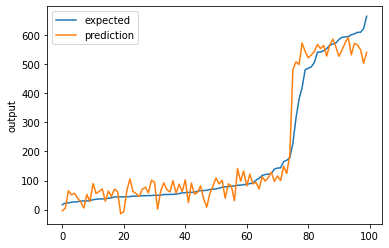

In [21]:
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
chart_regression(y_pred[:100].flatten(),y_test[:100],sort=True)

<AxesSubplot: >

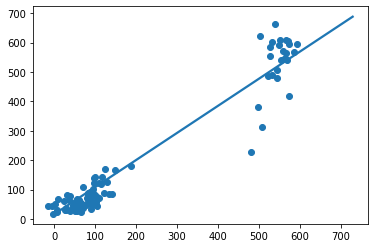

In [22]:
plt.scatter(y_pred[:100], y_test[:100])
#plt.scatter(X_train, y_train)
#plt.plot(X_test, y_pred)
sb.regplot(x = y_test, y = y_pred, scatter = False)
#plt.show()

In [23]:
kf = KFold(5,shuffle=True)

fold = 1
# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy
for train_index, validate_index in kf.split(X,y):
    model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = model.predict(X[validate_index])
    #print(y_test)
    #print(y_pred)
    #print(f"Fold #{fold}, Training Size: {len(trainDF)}, Validation Size: {len(validateDF)}")
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    fold += 1

Root Mean Squared Error: 62.302288014843626
Fold #1, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 62.35164743828711
Fold #2, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 62.817619410772664
Fold #3, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 62.495771612613076
Fold #4, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 62.94396300941553
Fold #5, Training Size: 231378, Validation Size: 57844


In [24]:
kf = KFold(10,shuffle=True)

fold = 1
# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy
for train_index, validate_index in kf.split(X,y):
    model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = model.predict(X[validate_index])
    #print(y_test)
    #print(y_pred)
    #print(f"Fold #{fold}, Training Size: {len(trainDF)}, Validation Size: {len(validateDF)}")
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    fold += 1
    
## Add average of RMSE for report anaylis

Root Mean Squared Error: 62.872991150755254
Fold #1, Training Size: 260299, Validation Size: 28923
Root Mean Squared Error: 63.37631632116367
Fold #2, Training Size: 260299, Validation Size: 28923
Root Mean Squared Error: 62.55440053024022
Fold #3, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 61.44804365117717
Fold #4, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 62.27427522114202
Fold #5, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 63.19726413844437
Fold #6, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 62.707775567668435
Fold #7, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 62.578417587043354
Fold #8, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 62.1835752600759
Fold #9, Training Size: 260300, Validation Size: 28922
Root Mean Squared Error: 62.60693372818687
Fold #10, Training Size: 260300, Validation Size: 28922
